<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [6]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @ 

In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [8]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [9]:
Tesla=yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [10]:
tesla_data=Tesla.history(period="max")

print(tesla_data)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...                ...         ...         ...         ...        ...   
2023-10-24  216.500000  222.050003  214.110001  216.520004  118231100   
2023-10-25  215.880005  220.100006  212.199997  212.419998  107065100   
2023-10-26  211.320007  214.800003  204.880005  205.759995  115112600   
2023-10-27  210.600006  212.410004  205.770004  207.300003   94728100   
2023-10-30  209.279999  210.880005  194.669998  197.360001  136061800   

            Dividends  Stock Splits  
Date        

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [11]:
tesla_data.reset_index(inplace=True)

In [12]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [13]:
T="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [14]:
Te= pd.read_html(T)

Parse the html data using `beautiful_soup`.


In [15]:
Tes=requests.get(T)

In [16]:
Tesl =Tes.text

In [17]:
Tesla=BeautifulSoup(Tesl, "html.parser")

In [18]:
Tesla_=Tesla.find("title")

In [19]:
Tesla_

<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
Tesla_d = Tesla.find_all("title")[0]

In [21]:
df = pd.read_html(str(T))[0]

In [126]:
df.columns = ['Fecha', 'Ingresos']

In [23]:
tesla_revenue = df

In [24]:
tesla_revenue.columns

Index(['Fecha', 'Ingresos'], dtype='object')

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [66]:
tesla_revenue['Ingresos'] = tesla_revenue['Ingresos'].replace(',', '', regex=True)



In [67]:
tesla_revenue['Ingresos'] = tesla_revenue['Ingresos'].replace('$', '', regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [95]:
tesla_revenue = tesla_revenue.dropna(subset=['Ingresos'])



Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [90]:
tesla_revenue.tail(5)

,Fecha,Ingresos
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [28]:
GameStop=yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [29]:
gme_data=GameStop.history(period="max")

print(gme_data)

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620129   1.693350   1.603296   1.691667  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600        0.0   
2002-02-15   1.683250   1.687458   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615920   1.662210   1.603296   1.662210   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-10-24  13.590000  14.300000  13.550000  14.040000   3738300        0.0   
2023-10-25  14.010000  14.010000  13.610000  13.710000   1967300        0.0   
2023-10-26  13.730000  13.800000  13.410000  13.500000   2036400        0.0   
2023-10-27  13.510000  13.620000  13.020000  13.120000   2475800        0.0   
2023-10-30  13.150000  13.270000  12.590000  12.8000

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [30]:
gme_data.reset_index(inplace=True)

In [31]:
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [32]:
html_data= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

Parse the html data using `beautiful_soup`.


In [33]:
h=requests.get(html_data)

In [34]:
ht= h.text

In [35]:
htm=BeautifulSoup(ht, "html.parser")

In [36]:
html=htm.find("title")

In [37]:
html

<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [70]:
html_ = htm.find_all("title")[0]

In [71]:
dafra = pd.read_html(str(html_data))[0]

In [125]:
dafra.columns = ['Fecha', 'Ingresos']

In [73]:
gme_revenue = df

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [82]:
gme_revenue.tail(5)

,Fecha,Ingresos
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [86]:
gme_revenue['Ingresos'] = gme_revenue['Ingresos'].astype(int)

In [88]:
tesla_revenue['Ingresos'] = tesla_revenue['Ingresos'].str.replace('$', '').str.replace(',', '')


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [89]:
tesla_revenue['Ingresos'] = tesla_revenue['Ingresos'].astype(int)

## Question 5: Plot Tesla Stock Graph


In [101]:
tesla_revenue

,Fecha,Ingresos
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


In [128]:
gme_revenue

,Fecha,Ingresos
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


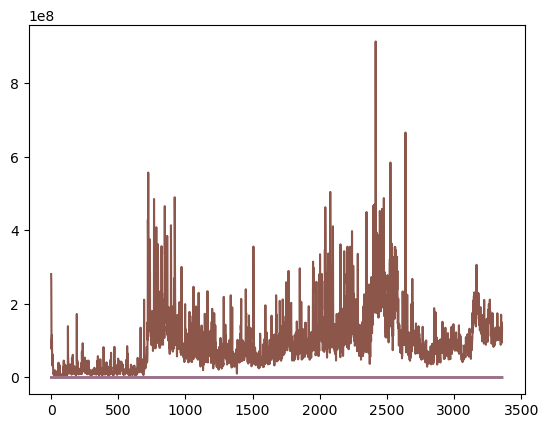

In [172]:
#Grafica tesla_data

plt.plot(tesla_data)


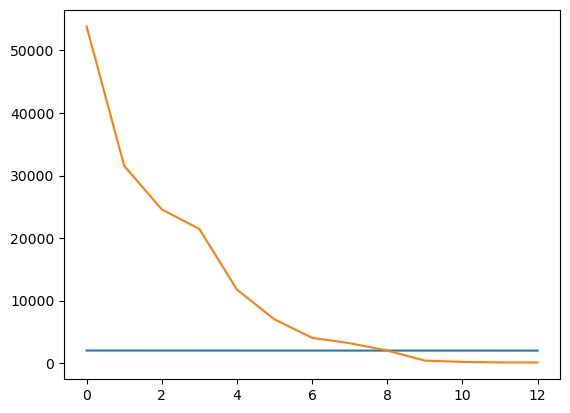

In [103]:
plt.plot(tesla_revenue)

In [158]:
tesla_data['Fecha'] = tesla_data['Fecha'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [153]:
tesla_data = tesla_data.rename(columns={'Date': 'Fecha'})

In [155]:
tesla_data

,Fecha,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...,...
3353,2023,216.500000,222.050003,214.110001,216.520004,118231100,0,0.0
3354,2023,215.880005,220.100006,212.199997,212.419998,107065100,0,0.0
3355,2023,211.320007,214.800003,204.880005,205.759995,115112600,0,0.0
3356,2023,210.600006,212.410004,205.770004,207.300003,94728100,0,0.0


In [131]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'], format='%y-%m-%d')

In [159]:
gme_data['Date'] = gme_data['Date'].dt.year

## Question 6: Plot GameStop Stock Graph


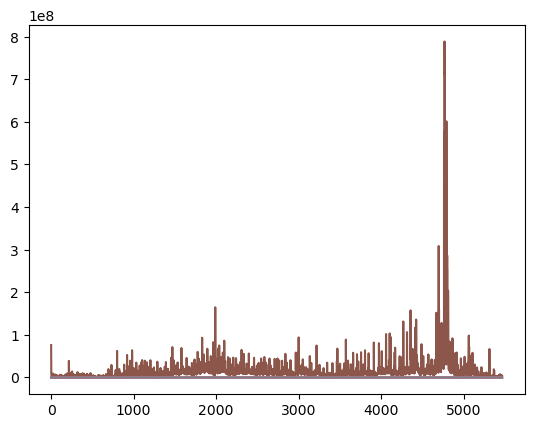

In [187]:
#grafica gme_data

plt.plot(gme_data)

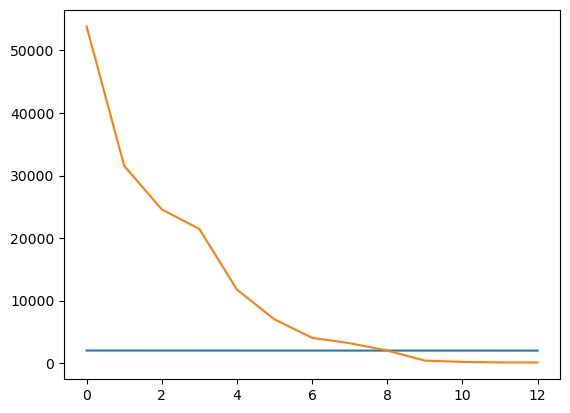

In [166]:
plt.plot(gme_revenue)

In [168]:
gme_data = gme_data.rename(columns={'Date': 'Fecha'})

In [165]:
gme_data

,Fecha,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5461,2023,13.590000,14.300000,13.550000,14.040000,3738300,0.0,0.0
5462,2023,14.010000,14.010000,13.610000,13.710000,1967300,0.0,0.0
5463,2023,13.730000,13.800000,13.410000,13.500000,2036400,0.0,0.0
5464,2023,13.510000,13.620000,13.020000,13.120000,2475800,0.0,0.0


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
